In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv('./tcdata/oppo_breeno_round1_data/gaiic_track3_round1_train_20210228.tsv', sep='\t', names=['sequenceA', 'sequenceB', 'label'])
df.shape  

(100000, 3)

In [36]:
df.head()   

,sequenceA,sequenceB,label
0,1 2 3 4 5 6 7,8 9 10 4 11,0
1,12 13 14 15,12 15 11 16,0
2,17 18 12 19 20 21 22 23 24,12 23 25 6 26 27 19,1
3,28 29 30 31 11,32 33 34 30 31,1
4,29 35 36 29,29 37 36 29,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sequenceA  100000 non-null  object
 1   sequenceB  100000 non-null  object
 2   label      100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [38]:
df.describe() 

,label
count,100000.000000
mean,0.364360
std,0.481253
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [64]:
df['sequenceA'].describe() 

count                         100000
unique                         90771
top       249 19 247 248 251 126 252
freq                              51
Name: sequenceA, dtype: object

In [60]:
word2count = {}
for s in df['sequenceA']:
    for w in s.split():
        w = int(w)
        if w in word2count.keys():
            word2count[w] += 1
        else:
            word2count[w] = 1
for s in df['sequenceB']:
    for w in s.split():
        w = int(w)
        if w in word2count.keys():
            word2count[w] += 1
        else:
            word2count[w] = 1

In [61]:
sorted(word2count.items())

[(1, 367),
 (2, 1278),
 (3, 1124),
 (4, 1613),
 (5, 8101),
 (6, 7557),
 (7, 267),
 (8, 7477),
 (9, 19572),
 (10, 20874),
 (11, 21548),
 (12, 74979),
 (13, 7178),
 (14, 977),
 (15, 142),
 (16, 22438),
 (17, 65),
 (18, 88),
 (19, 41002),
 (20, 327),
 (21, 149),
 (22, 160),
 (23, 26624),
 (24, 3969),
 (25, 3155),
 (26, 10),
 (27, 39),
 (28, 6250),
 (29, 68091),
 (30, 284),
 (31, 762),
 (32, 11521),
 (33, 1552),
 (34, 1113),
 (35, 1653),
 (36, 404),
 (37, 479),
 (38, 25),
 (39, 11351),
 (40, 458),
 (41, 757),
 (42, 1108),
 (43, 8905),
 (44, 2401),
 (45, 4547),
 (46, 5684),
 (47, 5236),
 (48, 10595),
 (49, 1683),
 (50, 5803),
 (51, 2),
 (52, 4018),
 (53, 2521),
 (54, 153),
 (55, 3032),
 (56, 1870),
 (57, 754),
 (58, 2190),
 (59, 4997),
 (60, 142),
 (61, 3),
 (62, 5744),
 (63, 515),
 (64, 219),
 (65, 1298),
 (66, 6931),
 (67, 4113),
 (68, 1796),
 (69, 1172),
 (70, 2163),
 (71, 606),
 (72, 7418),
 (73, 623),
 (74, 1305),
 (75, 918),
 (76, 5580),
 (77, 326),
 (78, 133),
 (79, 2830),
 (80, 4984

In [63]:
len(word2count)

19015

In [71]:
max(word2count.keys())

19015

In [62]:
sorted(word2count.items(), key=lambda word2count:word2count[1], reverse=True)

[(12, 74979),
 (29, 68091),
 (19, 41002),
 (23, 26624),
 (16, 22438),
 (11, 21548),
 (10, 20874),
 (9, 19572),
 (32, 11521),
 (39, 11351),
 (161, 11015),
 (48, 10595),
 (126, 9952),
 (243, 9036),
 (43, 8905),
 (5, 8101),
 (106, 7905),
 (6, 7557),
 (8, 7477),
 (72, 7418),
 (283, 7407),
 (13, 7178),
 (282, 7129),
 (66, 6931),
 (370, 6430),
 (28, 6250),
 (459, 6102),
 (247, 6080),
 (317, 5848),
 (50, 5803),
 (62, 5744),
 (140, 5736),
 (46, 5684),
 (76, 5580),
 (169, 5301),
 (47, 5236),
 (276, 5231),
 (59, 4997),
 (80, 4984),
 (202, 4921),
 (300, 4841),
 (217, 4636),
 (45, 4547),
 (426, 4391),
 (134, 4386),
 (127, 4310),
 (536, 4265),
 (230, 4158),
 (133, 4148),
 (67, 4113),
 (431, 4074),
 (52, 4018),
 (24, 3969),
 (447, 3947),
 (522, 3702),
 (227, 3690),
 (533, 3597),
 (226, 3579),
 (251, 3505),
 (432, 3360),
 (453, 3358),
 (253, 3345),
 (358, 3298),
 (168, 3238),
 (267, 3185),
 (176, 3175),
 (629, 3163),
 (25, 3155),
 (462, 3072),
 (55, 3032),
 (272, 3005),
 (153, 2930),
 (79, 2830),
 (3

In [72]:
s2count = {}
for index, s in enumerate(zip(df['sequenceA'], df['sequenceB'])):
    s2count[index] = len(s[0].split()) + len(s[1].split())


In [73]:
sorted(s2count.items())

[(0, 12),
 (1, 8),
 (2, 16),
 (3, 10),
 (4, 8),
 (5, 17),
 (6, 22),
 (7, 7),
 (8, 14),
 (9, 15),
 (10, 8),
 (11, 8),
 (12, 12),
 (13, 13),
 (14, 7),
 (15, 20),
 (16, 14),
 (17, 15),
 (18, 9),
 (19, 12),
 (20, 10),
 (21, 18),
 (22, 13),
 (23, 12),
 (24, 20),
 (25, 16),
 (26, 16),
 (27, 16),
 (28, 5),
 (29, 13),
 (30, 17),
 (31, 10),
 (32, 13),
 (33, 8),
 (34, 13),
 (35, 11),
 (36, 9),
 (37, 14),
 (38, 11),
 (39, 9),
 (40, 13),
 (41, 10),
 (42, 10),
 (43, 13),
 (44, 11),
 (45, 13),
 (46, 9),
 (47, 17),
 (48, 6),
 (49, 13),
 (50, 9),
 (51, 5),
 (52, 12),
 (53, 17),
 (54, 17),
 (55, 10),
 (56, 9),
 (57, 11),
 (58, 7),
 (59, 26),
 (60, 15),
 (61, 9),
 (62, 18),
 (63, 14),
 (64, 11),
 (65, 11),
 (66, 10),
 (67, 9),
 (68, 12),
 (69, 24),
 (70, 20),
 (71, 11),
 (72, 9),
 (73, 10),
 (74, 9),
 (75, 29),
 (76, 7),
 (77, 21),
 (78, 10),
 (79, 15),
 (80, 14),
 (81, 17),
 (82, 10),
 (83, 17),
 (84, 11),
 (85, 18),
 (86, 7),
 (87, 20),
 (88, 11),
 (89, 23),
 (90, 17),
 (91, 15),
 (92, 11),
 (93, 12),

In [74]:
sorted(s2count.items(), key=lambda s2count:s2count[1], reverse=True)

[(16105, 60),
 (64634, 60),
 (5366, 59),
 (21726, 57),
 (50690, 56),
 (80820, 56),
 (50440, 55),
 (36424, 54),
 (80103, 54),
 (27866, 53),
 (69427, 53),
 (47761, 52),
 (17811, 51),
 (33477, 51),
 (36115, 50),
 (40388, 50),
 (41275, 50),
 (32309, 49),
 (94658, 49),
 (5846, 47),
 (10068, 47),
 (96201, 47),
 (7233, 46),
 (86244, 46),
 (11636, 45),
 (74133, 45),
 (74524, 45),
 (11839, 44),
 (18882, 44),
 (36779, 44),
 (48270, 44),
 (76477, 44),
 (86212, 44),
 (88967, 44),
 (91728, 44),
 (91910, 44),
 (47040, 43),
 (53393, 43),
 (57756, 43),
 (78321, 43),
 (95441, 43),
 (9603, 42),
 (13038, 42),
 (15734, 42),
 (29677, 42),
 (41828, 42),
 (54209, 42),
 (86468, 42),
 (49527, 41),
 (77846, 41),
 (82326, 41),
 (85646, 41),
 (3260, 40),
 (7193, 40),
 (11814, 40),
 (28240, 40),
 (28865, 40),
 (45776, 40),
 (68946, 40),
 (82434, 40),
 (83135, 40),
 (95439, 40),
 (1181, 39),
 (1261, 39),
 (22031, 39),
 (36961, 39),
 (42146, 39),
 (46692, 39),
 (49705, 39),
 (61422, 39),
 (64263, 39),
 (74699, 39),


In [78]:
s_length2count = {}
for key, value in s2count.items():
    if value in s_length2count:
        s_length2count[value] += 1
    else:
        s_length2count[value] = 1

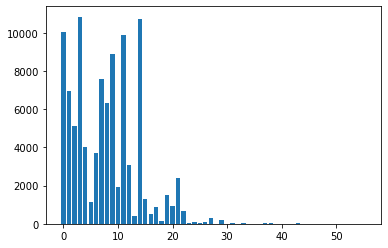

In [80]:
plt.bar(range(len(s_length2count)), s_length2count.values(), align='center')
plt.show()

In [87]:
sums = sums2 = 0
for k, v in s_length2count.items():
    if k <= 40:
        sums += v
    else:
        sums2 += v
print(sums)
print(sums2)

99948
52
